In [1]:
import pandas as pd
data = pd.read_csv('WineData.txt', sep=',', header=None )
data.columns=['Alcohol','Malic', 'acid','Ash','Alcalinity of ash','Magnesium','Total phenols','Flavanoids','Nonflavanoid phenols','Proanthocyanins','Color intensity','Hue','OD280/OD315 of diluted wines','Proline']
data.head()

,Alcohol,Malic,acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [2]:
#Para evitar el spam de los Future Warinigs que aparecen durante el ejercicio los voy a ocultar

# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

# - Exercici 1

Crea almenys dos models de classificació diferents per intentar predir el millor les classes de l'arxiu adjunt.

## - Exercici 2

Compara els models de classificació utilitzant la precisió (accuracy), una matriu de confusió i d’altres mètriques més avançades.

In [3]:
# Modelo 1
#KNN Regression Classification

#Preprocessing Data for Classification
y = data['Alcohol']
X = data.drop(['Alcohol'], axis=1)

#Splitting Data into Train and Test Sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

#Feature Scaling for Classification
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
# fit only on X_train
scaler.fit(X_train)

# scale both X_train and X_test
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

#Training and Predicting for Classification
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier()
classifier.fit(X_train, y_train)

#predict classes of the test data
y_pred1 = classifier.predict(X_test)

In [4]:
#Evaluating KNN for Classification

#Accuracy

acc =  classifier.score(X_test, y_test)
print(acc)

0.9555555555555556


              precision    recall  f1-score   support

           1       0.94      1.00      0.97        15
           2       1.00      0.89      0.94        18
           3       0.92      1.00      0.96        12

    accuracy                           0.96        45
   macro avg       0.95      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



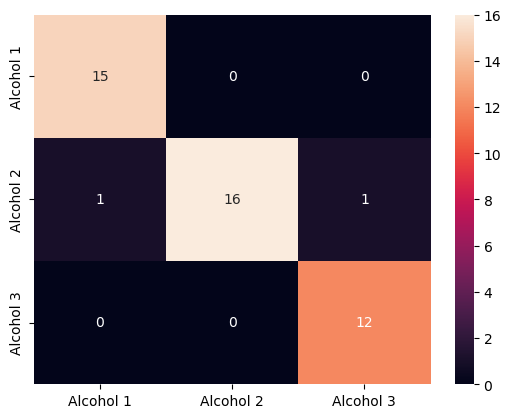

In [5]:
#Confussion matrix

from sklearn.metrics import classification_report, confusion_matrix
#importing Seaborn's to use the heatmap 
import seaborn as sns

# Adding classes names for better interpretation
classes_names = ['Alcohol 1','Alcohol 2','Alcohol 3']
cm = pd.DataFrame(confusion_matrix(y_test, y_pred1), 
                  columns=classes_names, index = classes_names)
                  
# Seaborn's heatmap to better visualize the confusion matrix
sns.heatmap(cm, annot=True, fmt='d');

print(classification_report(y_test, y_pred1))

In [6]:
#Modelo2
#SVM Model

#Import svm model
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets, which were already prepared for the previous model
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred2 = clf.predict(X_test)

In [7]:
# Evaluating the model

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred2))

Accuracy: 0.9777777777777777


              precision    recall  f1-score   support

           1       1.00      1.00      1.00        15
           2       1.00      0.94      0.97        18
           3       0.92      1.00      0.96        12

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



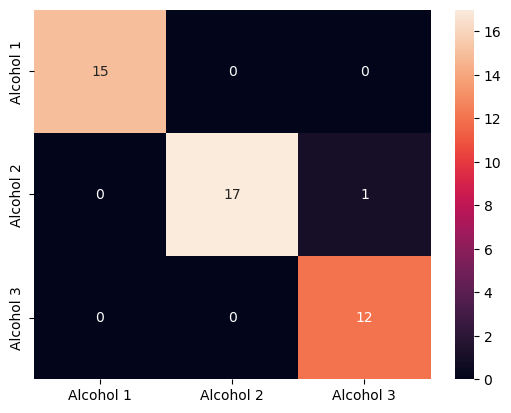

In [8]:
# Adding classes names for better interpretation
classes_names = ['Alcohol 1','Alcohol 2','Alcohol 3']
cm = pd.DataFrame(confusion_matrix(y_test, y_pred2), 
                  columns=classes_names, index = classes_names)
                  
# Seaborn's heatmap to better visualize the confusion matrix
sns.heatmap(cm, annot=True, fmt='d');

print(classification_report(y_test, y_pred2))

# - Exercici 3

Entrena’ls usant els diferents paràmetres que admeten per tal de millorar-ne la predicció.

In [9]:
#Modelo KNN

#Finding the Best K for KNN Classification
from sklearn.metrics import f1_score

f1s = []
    
# Calculating f1 score for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    # using average='weighted' to calculate a weighted average for the classes 
    f1s.append(f1_score(y_test, pred_i, average='weighted'))

Text(0, 0.5, 'F1 Score')

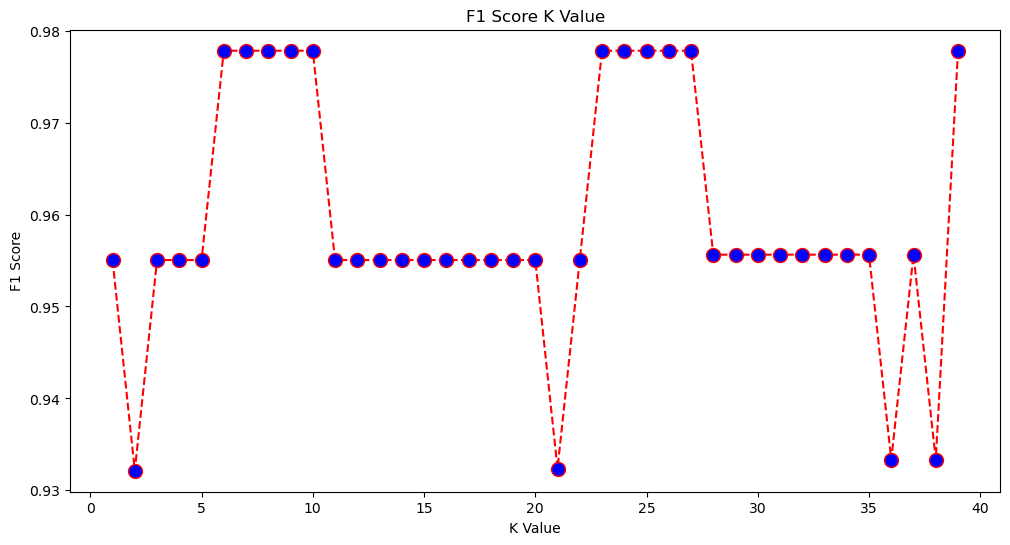

In [10]:
import matplotlib.pyplot as plt 

plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), f1s, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('F1 Score K Value')
plt.xlabel('K Value')
plt.ylabel('F1 Score')

From the output, we can see that the f1-score is the highest when the value of the K is between [6,11] & [23,27] & 40. Let's retrain our classifier with 6 neighbors and see what it does to our classification report results:

In [11]:
classifier6 = KNeighborsClassifier(n_neighbors=6)
classifier6.fit(X_train, y_train)
y_pred6 = classifier6.predict(X_test)
print(classification_report(y_test, y_pred6))

              precision    recall  f1-score   support

           1       0.94      1.00      0.97        15
           2       1.00      0.94      0.97        18
           3       1.00      1.00      1.00        12

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



In [16]:
#Modelo SVM

# Realizar la búsqueda de la mejor combinación de hiperparámetros utilizando GridSearchCV

from sklearn.model_selection import GridSearchCV
parameters = {'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 
              'C': [0.1, 1, 10, 100], 
              'gamma': [0.1, 1, 10, 100]}
grid = GridSearchCV(clf, parameters, cv=5)
grid.fit(X_train, y_train)

# Imprimir los resultados
print("Mejor combinación de hiperparámetros:", grid.best_params_)
print("Precisión en el conjunto de entrenamiento:", grid.best_score_)

# Predecir el conjunto de prueba utilizando el modelo ajustado
y_pred = grid.predict(X_test)

# Calcular la precisión en el conjunto de prueba
from sklearn.metrics import accuracy_score
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Precisión: {:.2f}%".format(accuracy * 100))

# Crear un nuevo modelo SVM Classifier con los mejores parámetros encontrados
svm_model_tuned = svm.SVC(**grid.best_params_)
svm_model_tuned.fit(X_train, y_train)

# Predecir las etiquetas de clase para el conjunto de pruebas utilizando el modelo afinado
y_pred_ = svm_model_tuned.predict(X_test)

# Calcular la precisión del modelo afinado
accuracy = accuracy_score(y_test, y_pred_)

# Imprimir la precisión del modelo afinado y los mejores parámetros
print("Precisión del modelo SVM Classifier afinado: {:.2f}%".format(accuracy*100))

Mejor combinación de hiperparámetros: {'C': 1, 'gamma': 0.1, 'kernel': 'linear'}
Precisión en el conjunto de entrenamiento: 0.9772079772079773
Precisión: 97.78%
Precisión del modelo SVM Classifier afinado: 97.78%


Para el modelo de clasificacion KNN hemos visto como encontrando el mejor valor del parametro k, en este caso 6, la precision del modelo mejora de 96% a 98%.

En el caso del modelo SVM a pesar de haberlo probado con los mejores parametros posibles la precision se ha mantenido en 98% en ambos casos, lo que nos dice que el primer modelo creado ya era optimo.

# - Exercici 4

Compara el seu rendiment fent servir l’aproximació traint/test o cross-validation.

In [21]:
# Usamos la validación cruzada para evaluar el rendimiento de los clasificadores
from sklearn.model_selection import cross_val_score

scores_svc = cross_val_score(svm_model_tuned, X, y, cv=5)
scores_knn = cross_val_score(classifier6, X, y, cv=5)

# Mostramos los resultados de la validación cruzada
print(f"Precisión SVM: {scores_svc.mean()}")
print(f"Precisión KNN: {scores_knn.mean()}")

Precisión SVM: 0.961111111111111
Precisión KNN: 0.6914285714285714


# - Exercici 5

Aplica algun procés d'enginyeria per millorar els resultats (normalització, estandardització, mostreig...)

En el primer modelo KNN ya se normalizó y estandarizo la muestra con StandardScaler(), fit(), transform().

La variable X_train, estandarazida y normalizada, se ha utilizado para el resto de modelos, por lo que se ha trabajado durante todos los ejercicios con este paso ya realizado.
La variable X_test tambien fue escalada.